# LINEAR REGRESSION ON CAR PRICE PREDICTION

## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
folder_name = r"C:/Sumay"
name = "CarPrice_Assignment.csv"
print(os.path.join(folder_name,name))

C:/Sumay\CarPrice_Assignment.csv


In [2]:
df = pd.read_csv("C:/Sumay/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

## Cleaning Data

In [4]:
#Cleaning the Car name
CompanyName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, "CompanyName", CompanyName)
df.drop(['CarName'], axis=1, inplace=True)
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


There are inconveniences due to spelling errors, example, maxda and mazda, etc.

In [5]:
df.CompanyName = df.CompanyName.str.lower()
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

C:\Users\talkt\AppData\Local\Temp\ipykernel_20248\3495997584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CompanyName.replace(a,b,inplace=True)


Used help from https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe for the analysis and cleansing

After analyzing the data, we can say that the important factors in determining the price are: 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 

## Performing Linear Regression on the cleansed and modified data

Used help from https://www.kaggle.com/code/jaypradipshah/multiple-linear-regression-from-scratch

In [6]:
import numpy as np

In [7]:
df.drop(columns=['symboling', 'CompanyName', 'doornumber', 'enginelocation', 'carheight', 'fuelsystem', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg'], inplace=True)

In [8]:
df

,car_ID,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,2,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,3,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,4,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,5,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,202,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,203,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,204,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


In [9]:
df.drop(columns=['car_ID'], inplace=True)
df

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fueltype        205 non-null    object 
 1   aspiration      205 non-null    object 
 2   carbody         205 non-null    object 
 3   drivewheel      205 non-null    object 
 4   wheelbase       205 non-null    float64
 5   carlength       205 non-null    float64
 6   carwidth        205 non-null    float64
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  price           205 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 22.6+ KB


In [11]:
#Converting categorical data into numeric
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first=True, dtype=float)
    df = pd.concat([df,temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df
df = dummies('fueltype', df)
df = dummies('aspiration', df)
df = dummies('carbody', df)
df = dummies('drivewheel', df)
df = dummies('enginetype', df)
df = dummies('cylindernumber', df)

In [12]:
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
#normalizing or feature scaling
df = (df - df.mean())/df.std()
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.027324,0.327995,-0.468149,...,-1.607428,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
1,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.403473,0.327995,-0.468149,...,-1.607428,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
2,-0.706865,-0.230948,-0.190101,0.513625,0.602571,-2.399008,1.261448,0.403473,0.327995,-0.468149,...,-1.607428,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725
3,0.173274,0.206750,0.136209,-0.419770,-0.430023,-0.516003,-0.053537,0.084279,0.327995,-0.468149,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
4,0.106848,0.206750,0.229440,0.515545,0.218350,-0.516003,0.275209,0.522389,0.327995,-0.468149,...,0.619077,-0.28029,-0.259573,-0.140725,4.189312,-1.854632,-0.363249,-0.069843,-0.069843,-0.140725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.761377,0.338419,1.662375,0.249921,0.446659,0.327995,-0.468149,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
201,1.717669,1.195622,1.348215,0.947672,0.338419,1.662375,1.413178,0.722042,0.327995,2.125651,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
202,1.717669,1.195622,1.394830,0.876611,1.106861,0.923942,0.755685,1.027468,0.327995,-0.468149,...,-1.607428,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725
203,1.717669,1.195622,1.394830,1.270327,0.434474,-1.180593,0.047616,1.150765,-3.033954,2.125651,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725


In [14]:
y=np.asarray(df['price'].values.tolist())
y

array([ 2.73242539e-02,  4.03473402e-01,  4.03473402e-01,  8.42786174e-02,
        5.22389106e-01,  2.47005370e-01,  5.54934457e-01,  7.06395512e-01,
        1.32663479e+00,  5.73606350e-01,  3.94711192e-01,  4.56672533e-01,
        9.63003084e-01,  9.79901631e-01,  1.41300514e+00,  2.18846071e+00,
        3.50967677e+00,  2.95452819e+00, -1.01713115e+00, -8.73931609e-01,
       -8.38882770e-01, -9.64432718e-01, -8.63667306e-01, -6.65891714e-01,
       -8.82193121e-01, -8.24237362e-01, -7.09452414e-01, -5.90661884e-01,
       -5.45223568e-01, -3.91433660e-02, -8.50899515e-01, -8.03833931e-01,
       -9.86087894e-01, -8.44640793e-01, -7.69536138e-01, -7.48757183e-01,
       -7.48757183e-01, -6.73652528e-01, -5.23443218e-01, -5.54736824e-01,
       -3.73233907e-01, -4.15216801e-02, -3.66975186e-01, -8.12596140e-01,
       -5.45786853e-01, -5.45786853e-01, -2.78977565e-01,  2.37497060e+00,
        2.78804621e+00,  2.84437470e+00, -1.01162348e+00, -8.98966494e-01,
       -8.11344396e-01, -

In [15]:
df.drop(['price'], axis=1, inplace=True)

In [16]:
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,hardtop,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.327995,-0.468149,-0.201025,...,-1.607428,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
1,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.327995,-0.468149,-0.201025,...,-1.607428,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
2,-0.706865,-0.230948,-0.190101,0.513625,0.602571,-2.399008,1.261448,0.327995,-0.468149,-0.201025,...,-1.607428,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725
3,0.173274,0.206750,0.136209,-0.419770,-0.430023,-0.516003,-0.053537,0.327995,-0.468149,-0.201025,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
4,0.106848,0.206750,0.229440,0.515545,0.218350,-0.516003,0.275209,0.327995,-0.468149,-0.201025,...,0.619077,-0.28029,-0.259573,-0.140725,4.189312,-1.854632,-0.363249,-0.069843,-0.069843,-0.140725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.761377,0.338419,1.662375,0.249921,0.327995,-0.468149,-0.201025,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
201,1.717669,1.195622,1.348215,0.947672,0.338419,1.662375,1.413178,0.327995,2.125651,-0.201025,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725
202,1.717669,1.195622,1.394830,0.876611,1.106861,0.923942,0.755685,0.327995,-0.468149,-0.201025,...,-1.607428,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725
203,1.717669,1.195622,1.394830,1.270327,0.434474,-1.180593,0.047616,-3.033954,2.125651,-0.201025,...,0.619077,-0.28029,-0.259573,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725


In [17]:
X=np.asarray(df.values.tolist())
X

array([[-1.68664293, -0.4254799 , -0.84271939, ..., -0.06984303,
        -0.06984303, -0.14072463],
       [-1.68664293, -0.4254799 , -0.84271939, ..., -0.06984303,
        -0.06984303, -0.14072463],
       [-0.70686548, -0.23094769, -0.19010076, ..., -0.06984303,
        -0.06984303, -0.14072463],
       ...,
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.06984303, -0.14072463],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.06984303, -0.14072463],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.06984303, -0.14072463]])

In [18]:
y=y.reshape(len(y),1)

In [19]:
y.shape, X.shape

((205, 1), (205, 27))

In [20]:
X=np.concatenate((X,np.ones((205,1))), axis=1)
X

array([[-1.68664293, -0.4254799 , -0.84271939, ..., -0.06984303,
        -0.14072463,  1.        ],
       [-1.68664293, -0.4254799 , -0.84271939, ..., -0.06984303,
        -0.14072463,  1.        ],
       [-0.70686548, -0.23094769, -0.19010076, ..., -0.06984303,
        -0.14072463,  1.        ],
       ...,
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.14072463,  1.        ],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.14072463,  1.        ],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.14072463,  1.        ]])

In [21]:
X.shape

(205, 28)

In [22]:
#Splitting data into train and test set
def split_data(X, y, test_size=0.2, random_state=0):
    np.random.seed(random_state)
    indices=np.random.permutation(len(X))
    data_test_size=int(X.shape[0]*test_size)
    train_indices=indices[data_test_size:]
    test_indices=indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [23]:
#Coding the linear regression algorithm
class LinearRegression():
    def __init__(self):
        pass
    def forward(self,X,y,W):
        f=sum(W*X)
        loss=((f-y)**2)/2
        return loss, f
    def updateWeights(self,X,f,y_true,W,alpha,index):
        for i in range(X.shape[1]):
            W[i] -= (alpha*(f-y_true[index])*X[index][i])
        return W
    def train(self, X, y, iters=10, alpha=0.001, random_state=0):
        num_rows=X.shape[0]
        num_cols=X.shape[1]
        W=np.random.randn(1,num_cols)/np.sqrt(num_rows) #Weight initialization
        #calculating loss and updating weights
        train_loss = []
        num_iters = []
        train_indices = [i for i in range(X.shape[0])]
        for j in range(iters):
            cost=0
            np.random.seed(random_state)
            np.random.shuffle(train_indices)
            for i in train_indices:
                loss, f = self.forward(X[i],y[i],W[0])
                cost+=loss
                W[0]=self.updateWeights(X, f, y, W[0], alpha, i)
            train_loss.append(cost)
            num_iters.append(j)
        return W[0], train_loss, num_iters
    def test(self, X_test, y_test, W_trained):
        test_pred = []
        test_loss = []
        test_indices = [i for i in range(X_test.shape[0])]
        for i in test_indices:
            loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
            test_pred.append(y_test_pred)
            test_loss.append(loss)
        return test_pred, test_loss
    def predict(self, W_trained, X_sample):
        prediction=sum(W_trained*X_sample)
        return prediction
        

### Performing the linear regression

In [24]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

In [25]:
regressor=LinearRegression()

C:\Users\talkt\AppData\Local\Temp\ipykernel_20248\181674958.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i] -= (alpha*(f-y_true[index])*X[index][i])


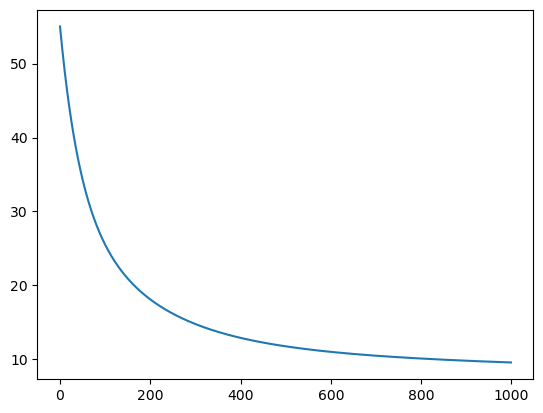

In [29]:
#training
W_trained, train_loss, num_iters = regressor.train(X_train, y_train, iters=1000, alpha=0.00001)
plt.plot(num_iters, train_loss)

In [330]:
#testing
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

In [331]:
test_pred

[5.674235915654175,
 1.5336583295300117,
 0.5913119967923832,
 -0.4355751370184221,
 0.8965569625351941,
 -1.3557140766292939,
 7.02906858335727,
 4.293373910083211,
 3.0417023841654314,
 6.650986211880368,
 2.2982393983745593,
 52.558082060010655,
 -2.0637003578646755,
 -1.3625391437925183,
 4.022711344127069,
 -0.7898725130218923,
 -0.8772962977231824,
 6.303733574406799,
 2.217508411016529,
 5.7075688983998125,
 -0.37280688609122664,
 1.9696927065783676,
 -0.10687199496165045,
 -0.4827847452209516,
 1.3834625816650954,
 3.283233767901396,
 3.8419465987702544,
 4.415549038403184,
 2.8684361012173047,
 5.810146005819925,
 1.8161352504955688,
 -0.14326199453749064,
 4.7694503699153215,
 -0.026835967825337925,
 4.725944332834114,
 37.36420176664079,
 1.389130750235227,
 2.644662499750938,
 6.501329300387851,
 80.26963154792841,
 4.0593990071409785]

In [332]:
len(test_pred)

41